In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train.dtype

dtype('uint8')

In [11]:
y_train.shape

(60000,)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

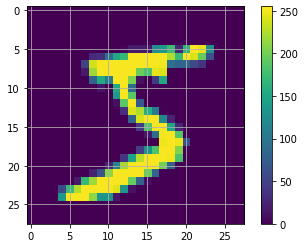

In [17]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [18]:
y_train[0]

5

In [24]:
class_names = ["Zero", "One", "Two", "Three", "Four",
                   "Five", "Six", "Seven", "Eight", "Nine"]

In [25]:
class_names[y_train[0]]

'Five'

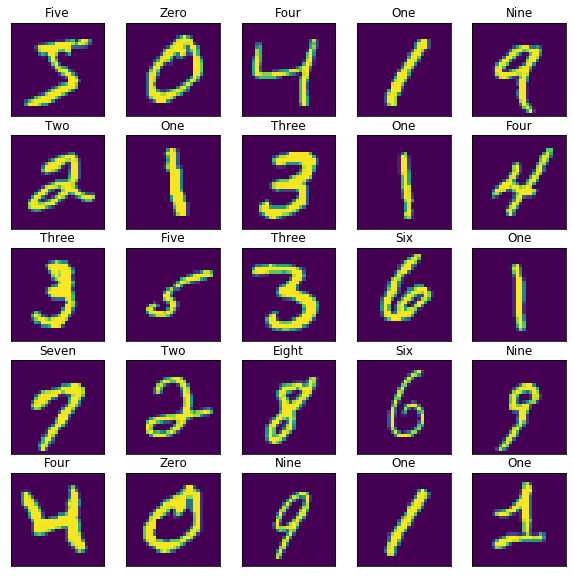

In [26]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i])
    #plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.title(class_names[(y_train[i])])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [28]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [29]:
x_train = x_train / 255
x_test = x_test / 255

In [30]:
x_train.dtype

dtype('float64')

In [32]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
# Separar el conjunto de entrenamiento completo en validación y entrenamiento
X_train_full = x_train[:55000]
y_train_full = y_train[:55000]

X_validation = x_train[55000:]
y_validation = y_train[55000:]

In [35]:
X_validation.shape

(5000, 28, 28)

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
from tensorflow.keras import layers

model = keras.models.Sequential()

model.add(layers.Flatten(input_shape=[28,28], name='flatten_layer')) #Output shape 784

model.add(layers.Dense(units=200, activation="tanh", name='hidden1'))
model.add(layers.Dense(units=200, activation="tanh", name='hidden2'))
model.add(layers.Dense(units=100, activation="relu", name='hidden3'))
model.add(layers.Dense(units=10, activation="softmax", name='output_layer'))

Instructions for updating:
Colocations handled automatically by placer.


In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_layer (Flatten)      (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 200)               157000    
_________________________________________________________________
hidden2 (Dense)              (None, 200)               40200     
_________________________________________________________________
hidden3 (Dense)              (None, 100)               20100     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 218,310
Trainable params: 218,310
Non-trainable params: 0
_________________________________________________________________


In [39]:
keras.utils.plot_model(model)

In [40]:
model.layers

In [41]:
weights, biases = model.get_layer('hidden1').get_weights()

In [42]:
weights.shape

(784, 200)

In [43]:
weights

array([[ 0.0674824 , -0.03465367,  0.05513383, ..., -0.00146575,
        -0.04398425, -0.05576299],
       [ 0.0095928 , -0.06445363,  0.05289482, ...,  0.05791213,
        -0.03711919, -0.04820505],
       [-0.03806082,  0.01861092,  0.06516658, ..., -0.06955294,
        -0.02222643,  0.05701804],
       ...,
       [ 0.03791299, -0.01227731,  0.01353994, ...,  0.02015082,
        -0.075427  ,  0.02867877],
       [ 0.01615492, -0.07314098,  0.05525303, ...,  0.02379236,
        -0.05108146,  0.06437916],
       [-0.03384015,  0.04340547, -0.0380045 , ...,  0.02074119,
        -0.03407571, -0.05373091]], dtype=float32)

In [44]:
biases.shape

(200,)

In [45]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [46]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint


#history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_validation,y_validation))
history = model.fit(X_train_full, y_train_full,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1)

Train on 49500 samples, validate on 5500 samples
Epoch 1/20
49500/49500 [==============================] - 4s 89us/sample - loss: 0.2455 - acc: 0.9247 - val_loss: 0.1616 - val_acc: 0.9511
Epoch 2/20
49500/49500 [==============================] - 4s 83us/sample - loss: 0.1157 - acc: 0.9628 - val_loss: 0.1666 - val_acc: 0.9504
Epoch 3/20
49500/49500 [==============================] - 4s 86us/sample - loss: 0.0817 - acc: 0.9738 - val_loss: 0.1321 - val_acc: 0.9573
Epoch 4/20
49500/49500 [==============================] - 4s 82us/sample - loss: 0.0610 - acc: 0.9811 - val_loss: 0.1302 - val_acc: 0.9624
Epoch 5/20
49500/49500 [==============================] - 4s 84us/sample - loss: 0.0482 - acc: 0.9838 - val_loss: 0.1273 - val_acc: 0.9618
Epoch 6/20
49500/49500 [==============================] - 4s 84us/sample - loss: 0.0393 - acc: 0.9868 - val_loss: 0.1222 - val_acc: 0.9675
Epoch 7/20
49500/49500 [==============================] - 4s 85us/sample - loss: 0.0338 - acc: 0.9884 - val_loss: 0.1

In [48]:
history.params
history.epoch
history.history

{'loss': [0.24545848566474338,
  0.11569149553369391,
  0.08167817574799663,
  0.06101917752913303,
  0.04815903120416433,
  0.039318355521220115,
  0.03383894821727705,
  0.02740769235394434,
  0.025340583262769882,
  0.019493807059894973,
  0.0213168397592657,
  0.01755964873480167,
  0.017140642367340413,
  0.01790517167425585,
  0.01583299673362776,
  0.017555805572447503,
  0.01523656751991413,
  0.013679371996064164,
  0.013925557296367635,
  0.014427545542042494],
 'acc': [0.92466664,
  0.96276766,
  0.97375757,
  0.9810909,
  0.9838182,
  0.98678786,
  0.98840404,
  0.99038386,
  0.9912121,
  0.9931717,
  0.9927475,
  0.99379796,
  0.9939192,
  0.9940404,
  0.9946061,
  0.99448484,
  0.9948889,
  0.99563634,
  0.99527276,
  0.9953131],
 'val_loss': [0.16161485174569218,
  0.16662830304015766,
  0.13214300535619258,
  0.13017235980453817,
  0.12726986683752725,
  0.12224478232132441,
  0.12311595935476097,
  0.12298357024060731,
  0.13013297858694567,
  0.1403805696660314,
  0.1

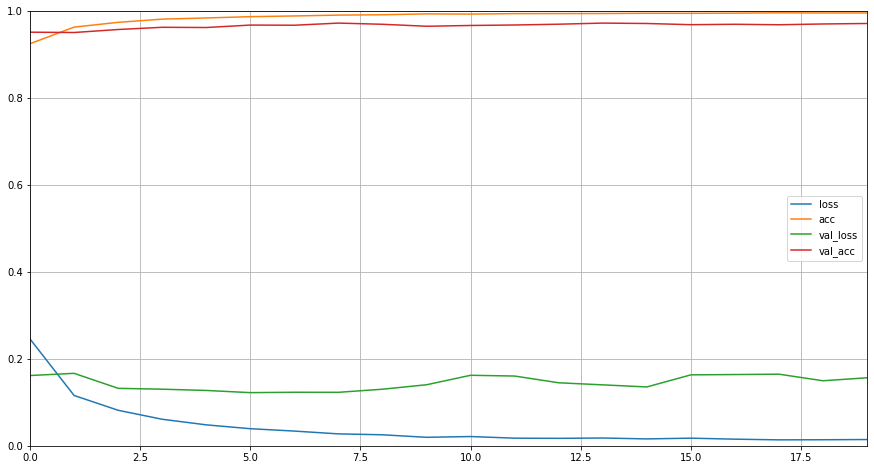

In [49]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [50]:
history2 = model.fit(X_train_full, y_train_full, epochs=100, batch_size=32, validation_split=0.1, initial_epoch=50)

Train on 49500 samples, validate on 5500 samples
Epoch 51/100
49500/49500 [==============================] - 4s 78us/sample - loss: 0.0128 - acc: 0.9958 - val_loss: 0.1767 - val_acc: 0.9684
Epoch 52/100
49500/49500 [==============================] - 4s 79us/sample - loss: 0.0142 - acc: 0.9956 - val_loss: 0.1863 - val_acc: 0.9691
Epoch 53/100
49500/49500 [==============================] - 4s 78us/sample - loss: 0.0135 - acc: 0.9955 - val_loss: 0.1407 - val_acc: 0.9729
Epoch 54/100
49500/49500 [==============================] - 4s 88us/sample - loss: 0.0117 - acc: 0.9962 - val_loss: 0.1662 - val_acc: 0.9736
Epoch 55/100
49500/49500 [==============================] - 4s 90us/sample - loss: 0.0146 - acc: 0.9951 - val_loss: 0.1540 - val_acc: 0.9724
Epoch 56/100
49500/49500 [==============================] - 4s 85us/sample - loss: 0.0128 - acc: 0.9960 - val_loss: 0.1806 - val_acc: 0.9702
Epoch 57/100
49500/49500 [==============================] - 4s 86us/sample - loss: 0.0119 - acc: 0.9960 -

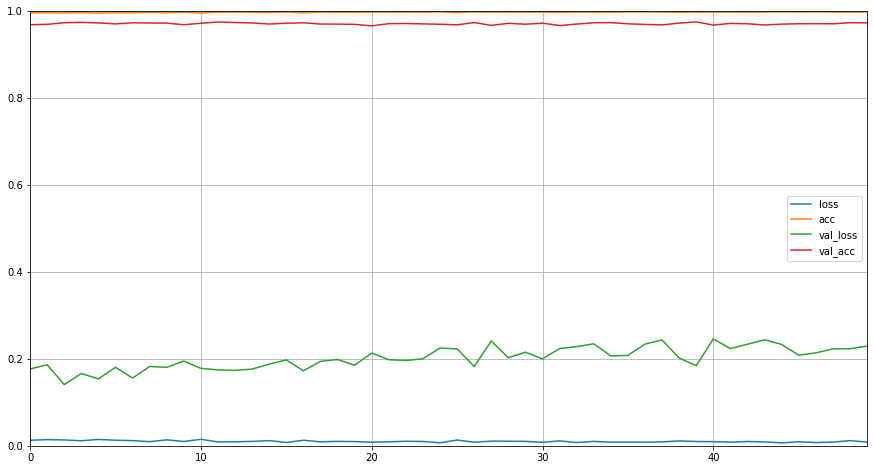

In [51]:
pd.DataFrame(history2.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [53]:
loss_and_metrics = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.1702 - acc: 0.9784


In [55]:
X_new = x_test[:5]

In [56]:
y_proba = model.predict(X_new).round(2)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
y_pred = model.predict_classes(X_new)
y_pred

array([7, 2, 1, 0, 4])

In [58]:
np.array(class_names)[y_pred]

array(['Seven', 'Two', 'One', 'Zero', 'Four'], dtype='<U5')

In [59]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [60]:
model.save('keras_housing.h5') #En formato HDF5

In [62]:
X_new = x_test[:5] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred

array([[3.24055764e-33, 2.23118472e-29, 4.21058329e-26, 3.40452799e-28,
        1.51978938e-22, 2.48997053e-35, 0.00000000e+00, 1.00000000e+00,
        3.67648702e-27, 8.62309981e-17],
       [1.32244161e-23, 1.50375612e-16, 1.00000000e+00, 1.06217826e-15,
        1.83102494e-33, 1.35549151e-24, 5.34061483e-26, 5.59245297e-27,
        2.49992439e-21, 1.61212017e-38],
       [1.08283344e-32, 1.00000000e+00, 1.28822477e-23, 3.76921567e-21,
        8.97890207e-30, 9.67623299e-22, 5.00848420e-23, 3.28614223e-19,
        1.45001207e-20, 1.18308168e-35],
       [1.00000000e+00, 5.54757765e-27, 7.22176225e-14, 6.11393465e-21,
        1.59169251e-30, 8.80959134e-25, 4.91052711e-22, 1.69660997e-17,
        2.70155376e-24, 1.35233172e-15],
       [2.18507923e-27, 9.28212657e-33, 8.05383037e-29, 3.89243014e-26,
        1.00000000e+00, 7.14047194e-29, 2.40707993e-22, 2.01613495e-17,
        5.08302024e-27, 5.45108569e-10]], dtype=float32)